#Importing Modules


In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import chardet
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import nltk
from nltk.corpus import stopwords
import string
from string import punctuation
from wordcloud import WordCloud
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split

nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\puvit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\puvit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Creating Object


In [18]:
CountV = CountVectorizer()
Tfidf = TfidfTransformer()
TfidfV = TfidfVectorizer()
GNM = GaussianNB()
BNM = BernoulliNB()
MNM = MultinomialNB()



#Loading CSV files


In [19]:

with open("spam.csv", 'rb') as f:
    result = chardet.detect(f.read())
df = pd.read_csv("spam.csv", encoding=result['encoding'])

df["Message"] = df["v2"]
df.drop('v2', axis=1, inplace=True)
df["Result"] = df["v1"]
df.drop("v1",axis =1 ,inplace =True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Message  5572 non-null   object
 1   Result   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#Finding any extra feature
Feature extraction


In [20]:
def find_word(text):
  newlist  = text.split()
  newnum = 0
  for i in newlist:
    newnum += len(i)
  return len(newlist)
def find_char(text):
  newlist  = text.split()
  newnum = 0
  for i in newlist:
    newnum += len(i)
  return newnum

df["No_of_words"] = df["Message"].apply(find_word)
df["No_of_chareter"] = df["Message"].apply(find_char)
df["Result"] = df["Result"].apply(lambda x : 0 if x=="ham" else 1 )


In [21]:
df.head()

,Message,Result,No_of_words,No_of_chareter
0,"Go until jurong point, crazy.. Available only ...",0,20,92
1,Ok lar... Joking wif u oni...,0,6,24
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,28,128
3,U dun say so early hor... U c already then say...,0,11,39
4,"Nah I don't think he goes to usf, he lives aro...",0,13,49


Analysiing the Data


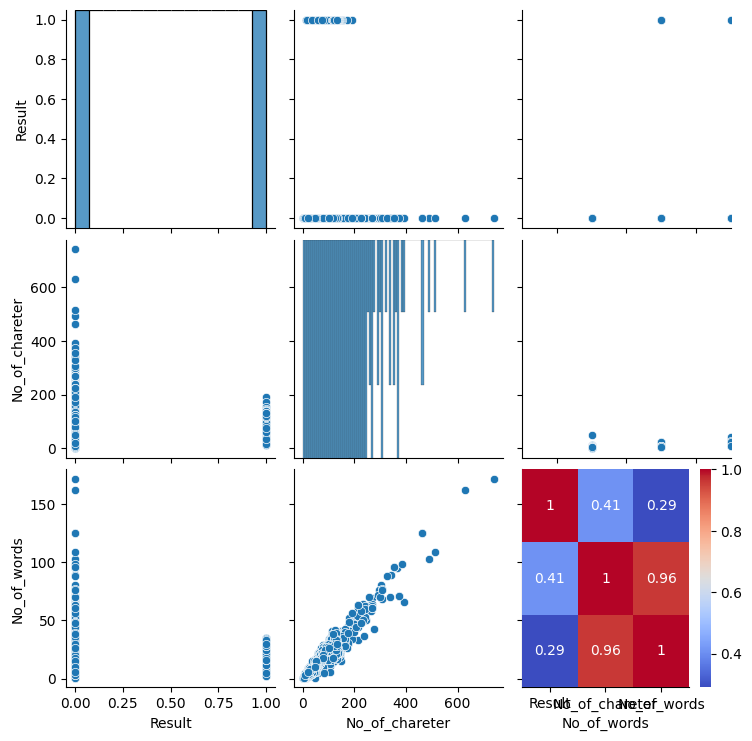

In [7]:

heatmap_data = df[['Result', 'No_of_chareter', 'No_of_words']]

correlation_matrix = heatmap_data.corr()
sns.pairplot( df[['Result', 'No_of_chareter','No_of_words']])
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()


 **Text Preprocess**
- lower case
- remove punctuation
- Stop words

#Preprocessing


In [22]:
def text_preprocess(text):
  text = text.lower()
  text = word_tokenize(text)
  y =[]
  for i in text:
    if i not in punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  newStop = set(stopwords.words("english"))
  for i in text:
    if i not in newStop:
      y.append(i)
  text = y[:]
  y.clear()
  stemmer = PorterStemmer()
  y = [stemmer.stem(words) for words in text ]
  return " ".join(y)
df["Processed_text"] = df["Message"].apply(text_preprocess)

In [23]:

df.head()


,Message,Result,No_of_words,No_of_chareter,Processed_text
0,"Go until jurong point, crazy.. Available only ...",0,20,92,go jurong point crazi .. avail bugi n great wo...
1,Ok lar... Joking wif u oni...,0,6,24,ok lar ... joke wif u oni ...
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,28,128,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,11,39,u dun say earli hor ... u c alreadi say ...
4,"Nah I don't think he goes to usf, he lives aro...",0,13,49,nah n't think goe usf live around though


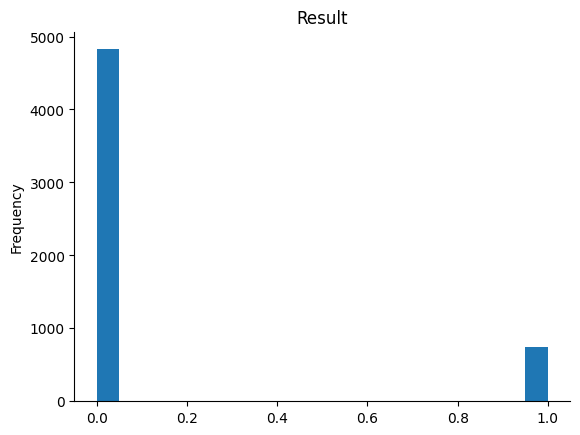

In [10]:


from matplotlib import pyplot as plt
df['Result'].plot(kind='hist', bins=20, title='Result')
plt.gca().spines[['top', 'right',]].set_visible(False)

#Creating a Model


In [24]:
from scipy.sparse import hstack
from scipy import sparse
XCount = df['Processed_text']
YCount = df['Result']


Tfidf = TfidfVectorizer()


XTfidf = Tfidf.fit_transform(XCount)

X_train , X_test, Y_train , Y_test = train_test_split(XTfidf,YCount,test_size = 0.2)

In [25]:

modelMM = MNM.fit(X_train.toarray(), Y_train)
predictionM = modelMM.predict(X_test.toarray())

In [26]:


print(precision_score(Y_test,predictionM))



print(f'MM -  {accuracy_score(Y_test,predictionM )}')

1.0
MM -  0.967713004484305


In [34]:
newsrtring = "Go until jurong point, crazy.. Available only "
text = text_preprocess(newsrtring)

In [35]:
text = Tfidf.transform([text])
predictionM = modelMM.predict(text.toarray())

In [36]:
predictionM

array([0], dtype=int64)

In [37]:
print("spam") if predictionM[0]==1  else print("ham") 

ham
